## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
#HEllo world
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
md = pd.merge(mouse_metadata,study_results,on="Mouse ID" )
# Display the data table for preview
md.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0.0,45.000000,0
1,k403,Ramicane,Male,21,16,5.0,46.016006,0
2,k403,Ramicane,Male,21,16,10.0,47.972927,1
3,k403,Ramicane,Male,21,16,15.0,49.159749,3
4,k403,Ramicane,Male,21,16,20.0,58.965720,1


In [2]:
# Checking the number of mice.
mouse_metadata.count()

Mouse ID        249
Drug Regimen    249
Sex             249
Age_months      249
Weight (g)      249
dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
pltData = md[["Mouse ID","Drug Regimen"]]
cmd = md.drop_duplicates(subset=["Mouse ID","Timepoint"])


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [34]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cmd = md.drop_duplicates(subset=["Mouse ID","Timepoint"])
rcmd = cmd

In [6]:
# Checking the number of mice in the clean DataFrame.
mouse = cmd["Mouse ID"].unique()
len(mouse)

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and 
# SEM of the tumor volume for each regimen
groupStats = cmd.groupby(["Drug Regimen", "Timepoint"])
meanTumor = pd.DataFrame(groupStats['Tumor Volume (mm3)'].mean())
meanTumor.reset_index(inplace = True);
meanTumor.head()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,Capomulin,0.0,45.000000
1,Capomulin,5.0,46.835014
2,Capomulin,10.0,47.947491
3,Capomulin,15.0,49.191858
4,Capomulin,20.0,52.489014


In [8]:
#SEM
semTumor = pd.DataFrame(groupStats['Tumor Volume (mm3)'].sem())
#Median
medTumor = pd.DataFrame(groupStats['Tumor Volume (mm3)'].median())
#Variance
varTumor =  pd.DataFrame(groupStats['Tumor Volume (mm3)'].var())
#Standard Deviatopm
sdTumor = pd.DataFrame(groupStats['Tumor Volume (mm3)'].std())
#merge
mergedData = pd.merge(meanTumor,semTumor,on=["Drug Regimen","Timepoint"])
mergedData.columns = ["Drug Regimen","Timepoint","Mean Tumor Volume (mm3)","SEM Tumor Volume (mm3)"]
mergedData = pd.merge(mergedData,medTumor,on=["Drug Regimen","Timepoint"])
mergedData = pd.merge(mergedData,varTumor,on=["Drug Regimen","Timepoint"])
mergedData = pd.merge(mergedData,sdTumor,on=["Drug Regimen","Timepoint"])
mergedData.columns = ["Drug Regimen","Timepoint","Mean Tumor Volume(TV) (mm3)","SEM TV (mm3)","Median TV (mm3)" ,"Var TV (mm3)" ,"Std Dev TV (mm3)" ]
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mergedData.head()

,Drug Regimen,Timepoint,Mean Tumor Volume(TV) (mm3),SEM TV (mm3),Median TV (mm3),Var TV (mm3),Std Dev TV (mm3)
0,Capomulin,0.0,45.000000,0.000000,45.000000,0.000000,0.000000
1,Capomulin,5.0,46.835014,0.272690,46.886971,1.858997,1.363450
2,Capomulin,10.0,47.947491,0.798841,49.122969,15.953686,3.994207
3,Capomulin,15.0,49.191858,1.354275,51.352357,44.017438,6.634564
4,Capomulin,20.0,52.489014,0.639604,52.942902,9.409145,3.067433


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

semTumor = groupStats.agg({"Tumor Volume (mm3)": ["mean","sem","median","var","std"] })
semTumor.head()


Tumor Volume (mm3)                                  \
                                     mean       sem     median        var   
Drug Regimen Timepoint                                                      
Capomulin    0.0                45.000000  0.000000  45.000000   0.000000   
             5.0                46.835014  0.272690  46.886971   1.858997   
             10.0               47.947491  0.798841  49.122969  15.953686   
             15.0               49.191858  1.354275  51.352357  44.017438   
             20.0               52.489014  0.639604  52.942902   9.409145   

                                  
                             std  
Drug Regimen Timepoint            
Capomulin    0.0        0.000000  
             5.0        1.363450  
             10.0       3.994207  
             15.0       6.634564  
             20.0       3.067433

## Bar and Pie Charts

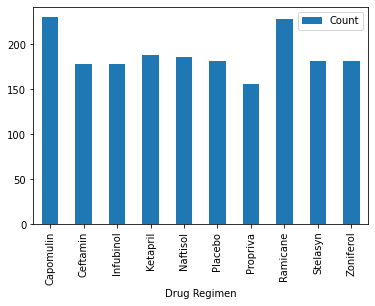

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

bdf = pltData.groupby(["Drug Regimen"])

bdfStats = pd.DataFrame(bdf["Drug Regimen"].count())
bdfStats.columns = ["Count"]
bdfStats.plot.bar()

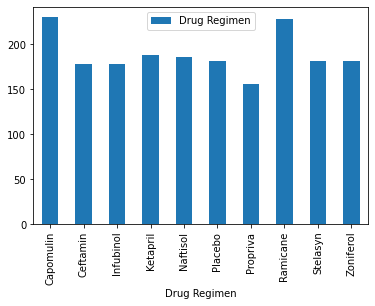

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
bdfStats = pd.DataFrame(bdf["Drug Regimen"].count()).plot(kind='bar')
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ffc300eea90>],
      dtype=object)

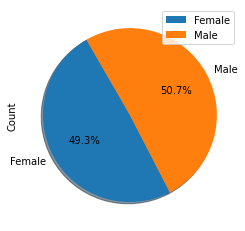

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gdf = md.groupby(["Sex"])
gdfStats = pd.DataFrame(gdf["Sex"].count())
gdfStats.columns = ["Count"]
gdfStats.plot.pie(subplots=True,autopct='%1.1f%%', shadow = True,startangle=120)


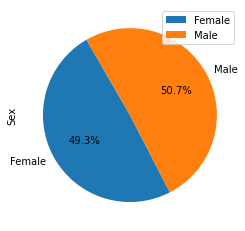

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gdfStats = pd.DataFrame(gdf["Sex"].count()).plot(kind='pie',subplots=True,autopct='%1.1f%%',startangle=120)
plt.show()

No handles with labels found to put in legend.


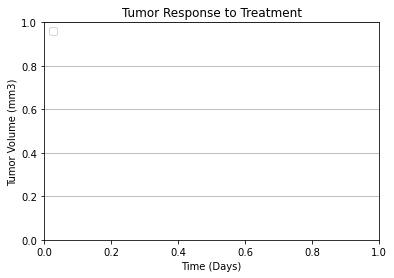

In [14]:
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")


plt.grid(which='major', axis='y', linestyle='-')
plt.legend(loc="upper left")

plt.savefig("treatment.png")
plt.show()



## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Start by getting the last (greatest) timepoint for each mouse
tpts = md.groupby(["Mouse ID"])['Timepoint'].max()
tpts = tpts.reset_index()
                         
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data = tpts.merge(md,on=['Mouse ID','Timepoint'],how="left")
merged_data

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45.0,Infubinol,Female,20,23,30.638696,0
1,a251,45.0,Infubinol,Female,21,25,72.226731,2
2,a262,45.0,Placebo,Female,17,29,78.567014,4
3,a275,45.0,Ceftamin,Female,20,28,65.341811,0
4,a366,30.0,Stelasyn,Female,16,29,55.341342,0
...,...,...,...,...,...,...,...,...
244,z435,10.0,Propriva,Female,12,26,49.145709,1
245,z578,45.0,Ramicane,Male,11,16,66.083066,3
246,z581,45.0,Infubinol,Female,24,25,67.685569,3
247,z795,45.0,Naftisol,Female,13,29,68.359777,4


In [16]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    row = merged_data.loc[merged_data["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset
    tumor_vol_data.append(row)
    
    # Determine outliers using upper and lower bounds
    quan = row.quantile([.25,.5,.75])
    
    # Determine outliers using upper and lower bounds
    quan = row.quantile([.25,.5,.75]).round(2)
    lowerq = quan[0.25].round(2)
    upperq = quan[0.75].round(2)
    delta = round(upperq-lowerq, 2)
    

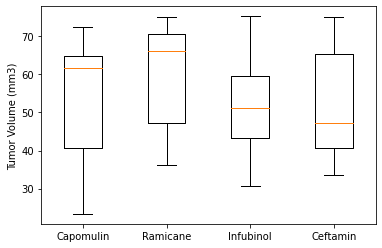

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol_data, labels = drugs)
plt.ylabel("Tumor Volume (mm3)")
plt.show()


## Line and Scatter Plots

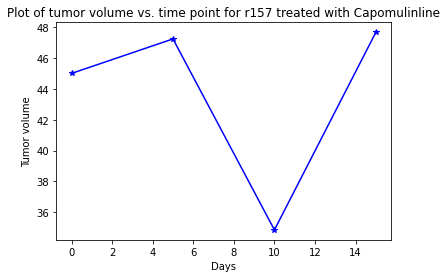

In [28]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulinline
linedf = cmd[(cmd["Drug Regimen"] == "Capomulin") & (cmd["Mouse ID"] == "r157")]

plt.plot(linedf["Timepoint"], linedf["Tumor Volume (mm3)"], color="blue",marker="*")
plt.title("Plot of tumor volume vs. time point for r157 treated with Capomulinline")
plt.xlabel("Days")
plt.ylabel("Tumor volume")
plt.show()


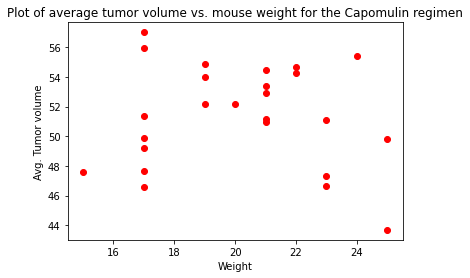

In [36]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
sinedf = rcmd[(rcmd["Drug Regimen"] == "Capomulin") ]
aveDs = sinedf.groupby(["Mouse ID"]).mean()
plt.scatter(aveDs["Weight (g)"], aveDs["Tumor Volume (mm3)"], color="red",marker="o")
plt.title("Plot of average tumor volume vs. mouse weight for the Capomulin regimen")
plt.xlabel("Weight")
plt.ylabel("Avg. Tumor volume")
plt.show()


## Correlation and Regression

Correlation co-efficient:-0.09


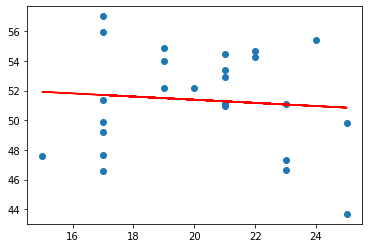

In [35]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
sinedf = rcmd[(rcmd["Drug Regimen"] == "Capomulin")]
aveDs = sinedf.groupby(["Mouse ID"]).mean()
c = st.pearsonr(aveDs["Tumor Volume (mm3)"],aveDs["Weight (g)"])[0]
print(f"Correlation co-efficient:{round(c,2)}")

#linear regression model 
reg = st.linregress(aveDs["Weight (g)"],aveDs["Tumor Volume (mm3)"])
slope = reg[0]
intercept = reg[1]
x= aveDs["Weight (g)"]
y = x * slope + intercept
plt.scatter(aveDs["Weight (g)"], aveDs["Tumor Volume (mm3)"])
plt.plot(aveDs["Weight (g)"],y, color="r")
plt.show()


In [37]:

#Observations and Insights
#1. Total number of mice in study = 249
#2. Correlation is -0.09
#3. from data r157 intially tumour got reduced, then there is a increase in size in late stage